### Math 395 Learning from Large Data Sets, Hope College, Fall 2024

# Assignment 4 - Logistic regression on the wine quality data to predict wine type

First download the data set from the following url:

https://archive.ics.uci.edu/dataset/186/wine+quality

and then unzip it to make a subfolder, called winequality, under your Python working directory (where you have been storing the python scripts from this course).

In this assignment, you are asked to fit a variety of logistic regression models on the wine quality data set, with wine type (categorical variable) as the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
import warnings
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV

## First, let us load the two types of wine (red and white) into Python separately. 

We will combine them together later to produce a single data set (with wine type as a categorical variable).

In [2]:
redwine = pd.read_table("../datasets/winequality/winequality-red.csv", sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
whitewine = pd.read_table("../datasets/winequality/winequality-white.csv", sep=';')
whitewine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Merge the two types of wine to create an expanded data set

In [6]:
allwine = pd.concat([redwine, whitewine], ignore_index=True)
allwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Define a new variable to record the wine type (1 : red, 0 : white)

In [7]:
winetype = np.concatenate((np.ones(redwine.shape[0]), np.zeros(whitewine.shape[0])))
allwine["winetype"] = winetype
allwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


## Do all of the following now. 

We are not splitting the training data into two parts this time, i.e., we use the whole data set for training. Keep in mind that all the errors to be computed below (except the regularized model) are training errors. 

### (a) Visualize the target variable (wine type) and a few (at least 2) other variables of your choice individually

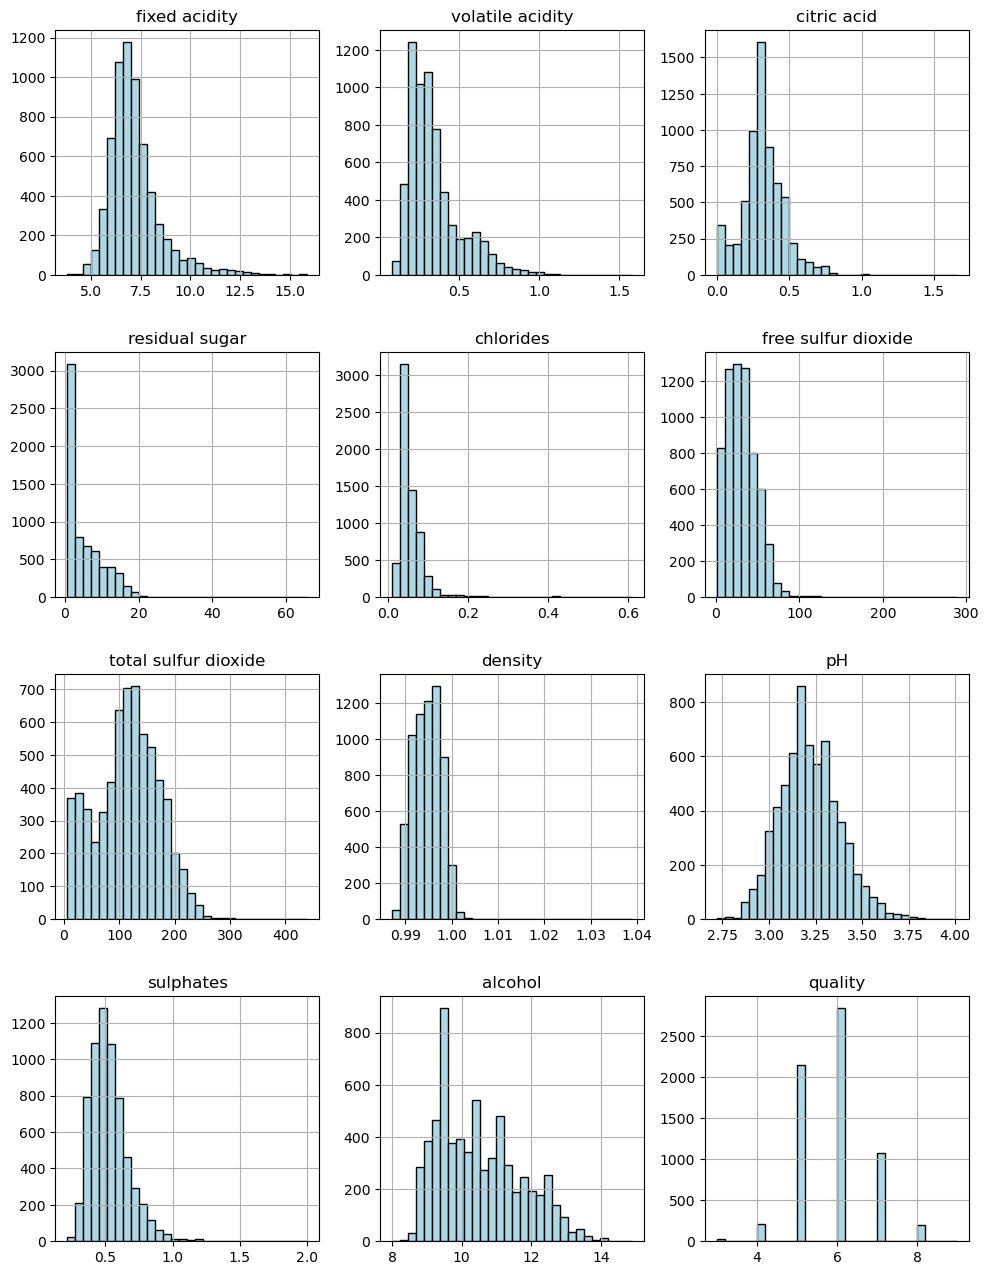

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))

for i in range(4):
    for j in range(3):
        ax[i, j].hist(allwine.iloc[:, i * 3 + j], bins=30, color='lightblue', edgecolor='black')
        ax[i, j].set_title(allwine.columns[i * 3 + j])
        ax[i, j].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=1.25)

### (b) Make a few scatterplots between wine type and each of several (at least 2) features you think would be best predictors

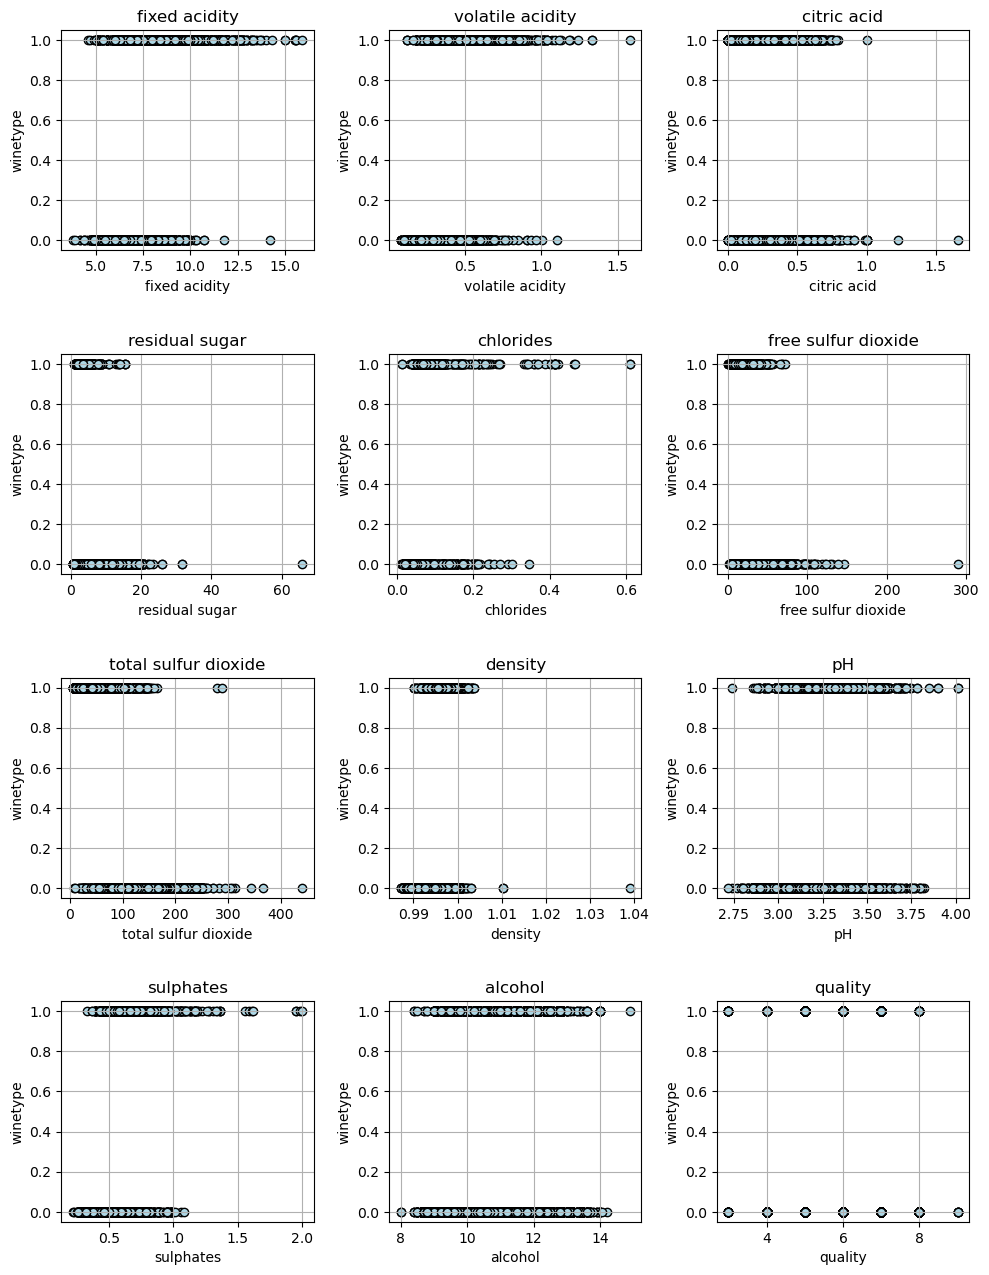

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))

for i in range(4):
    for j in range(3):
        ax[i, j].scatter(allwine.iloc[:, i * 3 + j], allwine["winetype"], color='lightblue', edgecolor='black')
        ax[i, j].set_title(allwine.columns[i * 3 + j])
        ax[i, j].set_xlabel(allwine.columns[i * 3 + j])
        ax[i, j].set_ylabel("winetype")
        ax[i, j].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=1.25)

Fit a logistic regression model with the best predictor you found. Plot the model along with the data. What is the training error? 

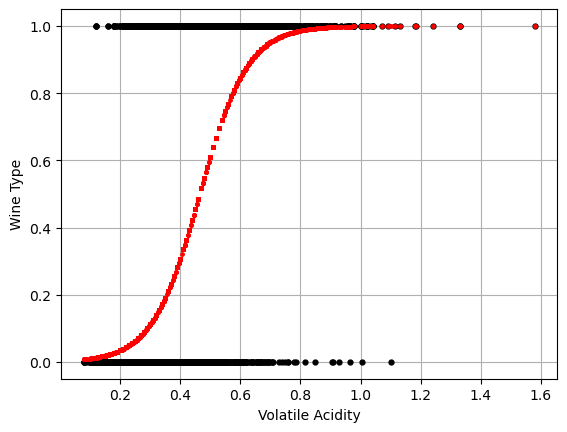

In [10]:
x = allwine['volatile acidity'].values.reshape(-1, 1)
y = allwine['winetype'].values

logisticModel = LogisticRegression(C=1e5).fit(x, y.ravel())  # C = 1/lambda

P = logisticModel.predict_proba(x)
yhat = P[:,1] 

plt.plot(x,y,'k.', markersize=7)
plt.plot(x,yhat,'r.', markersize=5)
plt.xlabel('Volatile Acidity')
plt.ylabel('Wine Type')
plt.grid('on')

In [11]:
warnings.filterwarnings("ignore")

logisticModel = LogisticRegression(C=1e5).fit(x, y.ravel())

yhat = logisticModel.predict(x)

print(f"Accuracy: {accuracy_score(y, yhat) * 100:.2f}%")
print(f"Error: {np.mean(yhat != y)*100:.2f}%")
print("\nConfusion Matrix: \n", confusion_matrix(y, yhat))
print("\nClassification Report: \n", classification_report(y, yhat))
print(f"\nROC AUC Score: {roc_auc_score(y, yhat)*100:.2f}%")

Accuracy: 86.84%
Error: 13.16%

Confusion Matrix: 
 [[4674  224]
 [ 631  968]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      4898
         1.0       0.81      0.61      0.69      1599

    accuracy                           0.87      6497
   macro avg       0.85      0.78      0.80      6497
weighted avg       0.86      0.87      0.86      6497


ROC AUC Score: 77.98%


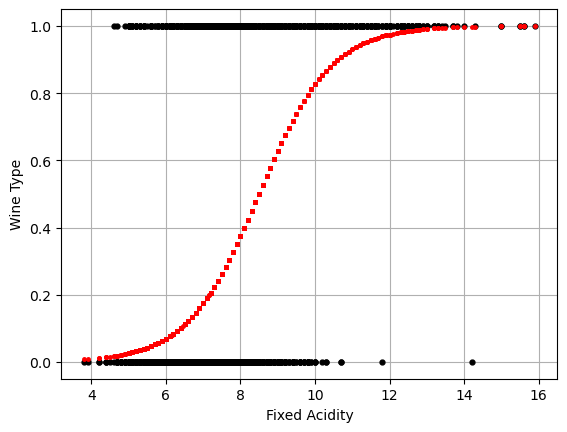

In [12]:
x = allwine['fixed acidity'].values.reshape(-1, 1)
y = allwine['winetype'].values

logisticModel = LogisticRegression(C=1e5).fit(x, y.ravel())  # C = 1/lambda

P = logisticModel.predict_proba(x)
yhat = P[:,1] 

plt.plot(x,y,'k.', markersize=7)
plt.plot(x,yhat,'r.', markersize=5)
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Type')
plt.grid('on')

In [13]:
warnings.filterwarnings("ignore")

logisticModel = LogisticRegression(C=1e5).fit(x, y.ravel())

yhat = logisticModel.predict(x)

print(f"Accuracy: {accuracy_score(y, yhat) * 100:.2f}%")
print(f"Error: {np.mean(yhat != y)*100:.2f}%")
print("\nConfusion Matrix: \n", confusion_matrix(y, yhat))
print("\nClassification Report: \n", classification_report(y, yhat))
print(f"\nROC AUC Score: {roc_auc_score(y, yhat)*100:.2f}%")

Accuracy: 81.68%
Error: 18.32%

Confusion Matrix: 
 [[4703  195]
 [ 995  604]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4898
         1.0       0.76      0.38      0.50      1599

    accuracy                           0.82      6497
   macro avg       0.79      0.67      0.70      6497
weighted avg       0.81      0.82      0.79      6497


ROC AUC Score: 66.90%


### (c) Check multicollinearity among all the features (including wine quality this time), through correlation matrix (which reveals pairwise correlations) and the condition number (overall correlation among all features). 

Comment on your findings. 

<Axes: >

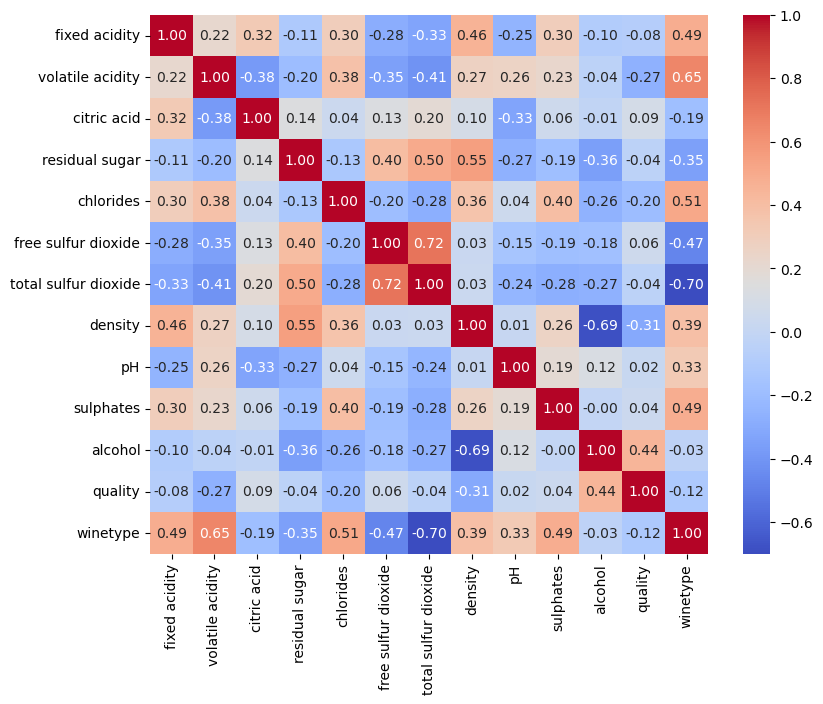

In [14]:
plt.figure(figsize=(9, 7))
matrix = allwine.corr()
sns.heatmap(matrix, cmap="coolwarm", annot=True, fmt=".2f")

In [15]:
eigenvalues = np.linalg.eigvals(matrix)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))

print("Condition number:", condition_number)

Condition number: 12.637059742014227


The predictors with the greatest correlation are alcohol and density with -0.69, total sulfur dioxide and winetype with -0.70, volatile acidity and winetype with 0.65, and total sulfur dioxide and free sulfur dioxide with 0.72. The condition number is 12.64, which indicates multicollinearity, however, it's not very strong.

Standardize all the features.

In [16]:
X = allwine.drop('winetype', axis=1)
y = allwine['winetype']
X_norm = StandardScaler().fit_transform(X)

### (d) Perform logistic regression on the training data with all features included (we call this the full model). 

Compute the misclassification error for the full model on the training data.

In [17]:
# Below X_norm is the matrix of standardized features, y is the target variable (quality)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 12), (5197,), (1300, 12), (1300,))

In [18]:
logisticModel = LogisticRegression(C=1e5).fit(X_train, y_train)

yhat = logisticModel.predict(X_train)

print(f"Accuracy: {accuracy_score(y_train, yhat)*100:.2f}%")
print(f"Error: {(1-accuracy_score(y_train, yhat))*100:.2f}%")
print("\nConfusion Matrix: \n", confusion_matrix(y_train, yhat))
print("\nClassification Report: \n", classification_report(y_train, yhat))
print(f"\nROC AUC Score: {roc_auc_score(y_train, yhat)*100:.2f}%")

Accuracy: 99.40%
Error: 0.60%

Confusion Matrix: 
 [[3927   12]
 [  19 1239]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3939
         1.0       0.99      0.98      0.99      1258

    accuracy                           0.99      5197
   macro avg       0.99      0.99      0.99      5197
weighted avg       0.99      0.99      0.99      5197


ROC AUC Score: 99.09%


Plot the feature coefficients and label those largest (in magnitude) with the feature names. Which features seem to be the most useful predictors?

In [19]:
theta0_train_full = logisticModel.intercept_
theta1_train_full = logisticModel.coef_[0]
theta0_train_full, theta1_train_full

(array([-4.8125243]),
 array([ 0.1467514 ,  1.51998153, -0.35768068, -4.89767025,  0.87443503,
         1.2816448 , -3.34418818,  4.60126648, -0.01187213,  0.66375416,
         1.53074677,  0.39213913]))

In [20]:
theta1_avg = sum(abs(theta1_train_full))/len(theta1_train_full)
theta1_avg

1.635177545083326

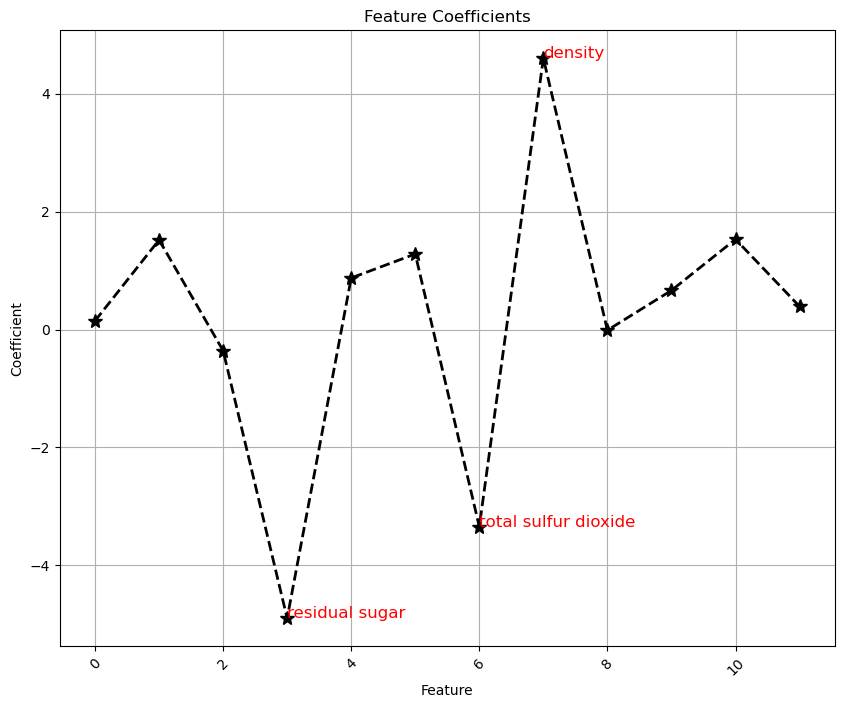

In [21]:
plt.figure(figsize=(10,8))
plt.plot(theta1_train_full, color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10)
for i in range(len(theta1_train_full)):
    if(abs(theta1_train_full[i]) >= theta1_avg):
        plt.text(i, theta1_train_full[i], X.columns[i], fontsize = 12, color='red')
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Feature Coefficients")
plt.grid(True)
plt.show()

Fit a logistic regression model with the two most important features (in terms of magnitude of coefficients). Report the training error and plot the decision boundary.

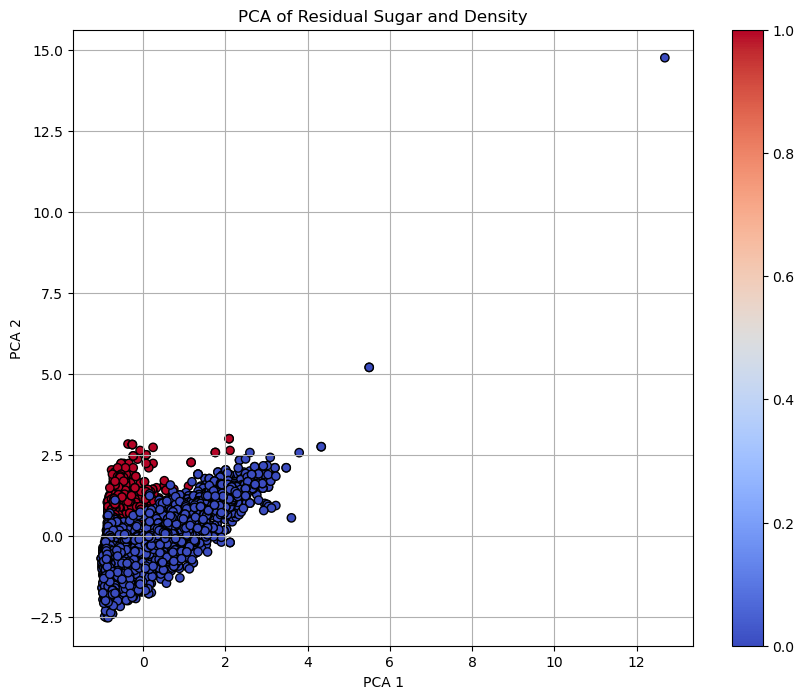

In [22]:
X = allwine[['residual sugar', 'density']]
y = allwine['winetype']

X_norm = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap='coolwarm', edgecolor='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Residual Sugar and Density')
plt.grid(True)
plt.colorbar()
plt.show()

In [23]:
multinomialLRmodel = LogisticRegression(C=1e5, multi_class='multinomial', solver='newton-cg').fit(X_norm, y.ravel())

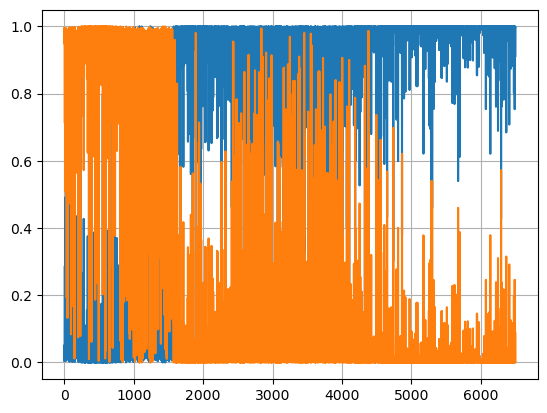

In [24]:
P = multinomialLRmodel.predict_proba(X_norm)
plt.plot(P)
plt.grid('on')

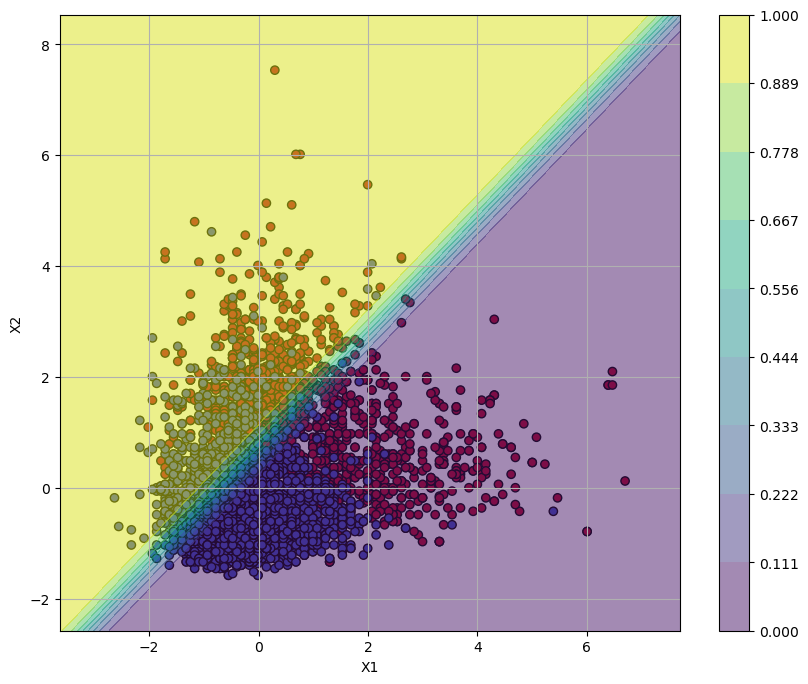

In [31]:
k1 = 200
k2 = 200

X1 = np.linspace(X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1, k1)
X2 = np.linspace(X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1, k2)

probs = np.zeros([k2, k1])
for i in range(k2):
    for j in range(k1):
        probs[i, j] = multinomialLRmodel.predict_proba([[X1[j], X2[i]]])[0, 1]

plt.figure(figsize=(10, 8))

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap='coolwarm', edgecolor='black')
contour = plt.contourf(X1, X2, probs, levels=np.linspace(0, 1, 10), alpha=0.5)
plt.ylabel('X2')
plt.xlabel('X1')
plt.grid('on')
plt.colorbar(contour)
plt.show()

## (e) Fit a $\ell_1$ regularized logistic regression model with the optimal alpha parameter (which is found by using cross validation) and apply it to the full training data. 

What is the training error of the validated model?

In [26]:
X = allwine.drop('winetype', axis=1)
y = allwine['winetype']
X_norm = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [27]:
clf = LogisticRegressionCV(cv=5, penalty='l1', solver = 'liblinear', max_iter=500, random_state=0).fit(X_train, y_train)
print('best alpha =', clf.C_)

best alpha = [2.7825594]


Accuracy: 99.40%
Error: 0.60%


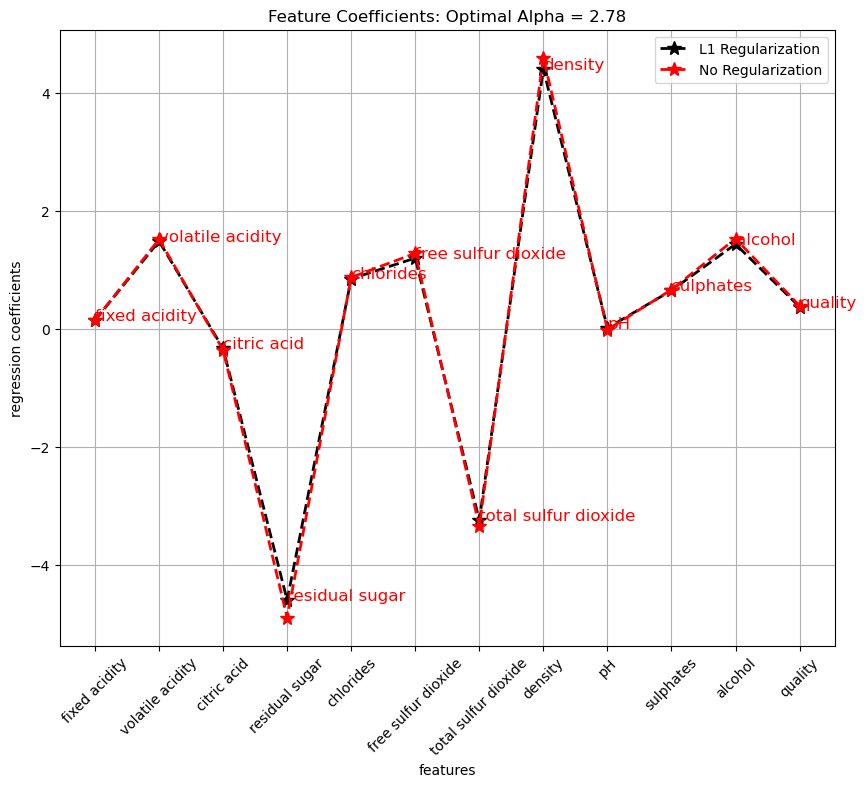

In [28]:
logisticModelfull = LogisticRegression(C=clf.C_[0], penalty='l1', solver = 'liblinear', max_iter=500).fit(X_train, y_train)
theta0_full = logisticModelfull.intercept_    # beta_0
theta1_full = logisticModelfull.coef_[0]      # beta_1

plt.figure(figsize=(10,8))

plt.plot(theta1_full.reshape(-1,1), color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10) # linear regression without regularization
plt.plot(theta1_train_full.reshape(-1,1), color='red',linestyle='dashed',linewidth =2,
            marker='*', markersize=10) # linear regression without regularization
plt.xticks(range(len(theta1_full)), X.columns, rotation=45)
for i in range(len(theta1_full)):
    plt.text(i, theta1_full[i], X.columns[i], fontsize = 12, color='red')
plt.xlabel('features');
plt.ylabel('regression coefficients');
plt.title(f'Feature Coefficients: Optimal Alpha = {clf.C_[0]:.2f}');
plt.legend(['L1 Regularization', 'No Regularization'])
plt.grid('on')

yhat = logisticModelfull.predict(X_train)

print(f"Accuracy: {accuracy_score(y_train, yhat)*100:.2f}%")
print(f"Error: {np.mean(yhat != y_train)*100:.2f}%")

plt.show()

Accuracy: 99.46%
Error: 0.54%


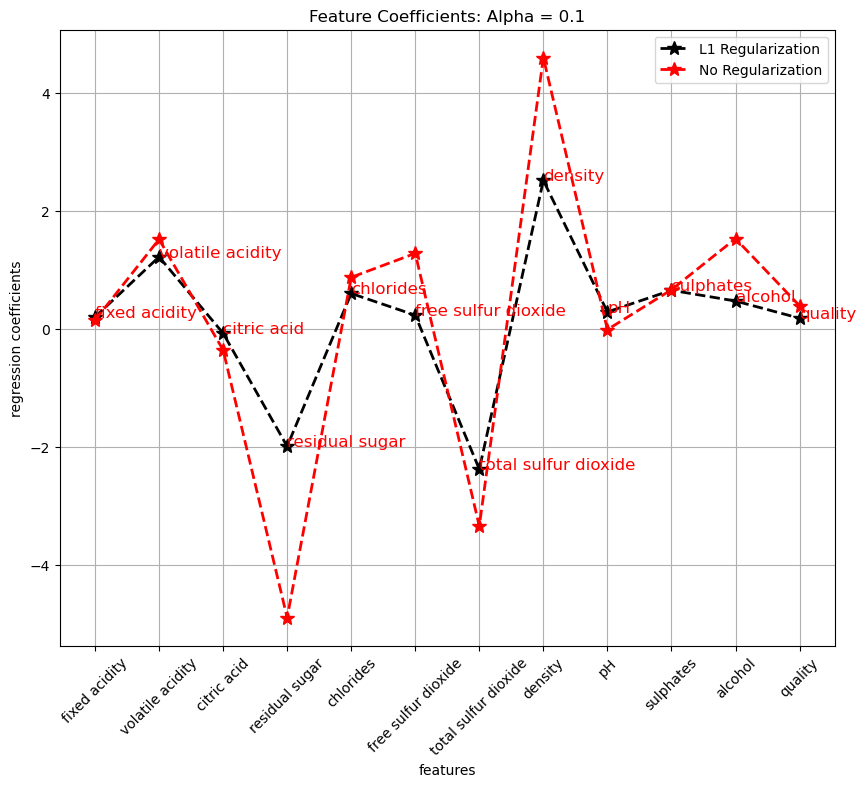

In [29]:
alpha = 0.1
logisticModelfull = LogisticRegression(C=alpha, penalty='l1', solver = 'liblinear', max_iter=500).fit(X_train, y_train)
theta0_full = logisticModelfull.intercept_    # beta_0
theta1_full = logisticModelfull.coef_[0]      # beta_1

plt.figure(figsize=(10,8))

plt.plot(theta1_full.reshape(-1,1), color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10) # linear regression without regularization
plt.plot(theta1_train_full.reshape(-1,1), color='red',linestyle='dashed',linewidth =2,
            marker='*', markersize=10) # linear regression without regularization
plt.xticks(range(len(theta1_full)), X.columns, rotation=45)
for i in range(len(theta1_full)):
    plt.text(i, theta1_full[i], X.columns[i], fontsize = 12, color='red')
plt.xlabel('features');
plt.ylabel('regression coefficients');
plt.title(f'Feature Coefficients: Alpha = {alpha}');
plt.legend(['L1 Regularization', 'No Regularization'])
plt.grid('on')

yhat = logisticModelfull.predict(X_train)

print(f"Accuracy: {accuracy_score(y_train, yhat)*100:.2f}%")
print(f"Error: {np.mean(yhat != y_train)*100:.2f}%")

plt.show()

Which predictors are kept and which ones are excluded from the full model? Which features are the most important (in terms of magnitude of coefficients)?

### The predictors that are kept in the full model are the following: 
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality

### The predictors that are excluded from the full model are the following: 
- wine type

### The most important features in terms of magnitude of coefficients are 
- density
- total sulfur dioxide
- residual sugar

Fit a logistic regression model with the top two features. Report the training error and plot the decision boundary.

In [30]:
# Because the coefficients

For the above model (with top two features), find the confusion matrix and use it to compute the precision, recall and F1 score.

## (f) Summarize your findings.